In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats as stats

# seaborn is a package for the visualization of statistical data
import seaborn as sns
sns.set(style='ticks')

In [2]:
df = pd.read_csv('C:\\Users\\magda\\Desktop\\ind2019er\\pi.csv')
x = df.ER30012

In [3]:
df.ER30012.mean()

np.std(df.ER30012, ddof=1)

df.ER30012.describe()

count    76998.000000
mean       360.179044
std       1510.726576
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       9999.000000
Name: ER30012, dtype: float64

In [4]:
stats_df = df.groupby('ER30012')['ER30012'].agg('count').pipe(pd.DataFrame).rename(columns = {'ER30012': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df['sft'] = 1 - stats_df['cdf']
stats_df = stats_df.reset_index()
stats_df.drop([0], inplace=True)
stats_df

x =  stats_df.ER30012

In [5]:
stats_df.ER30012.describe()

count    1530.000000
mean     3518.391503
std      2670.048973
min         3.000000
25%      1165.250000
50%      3095.500000
75%      5296.500000
max      9999.000000
Name: ER30012, dtype: float64

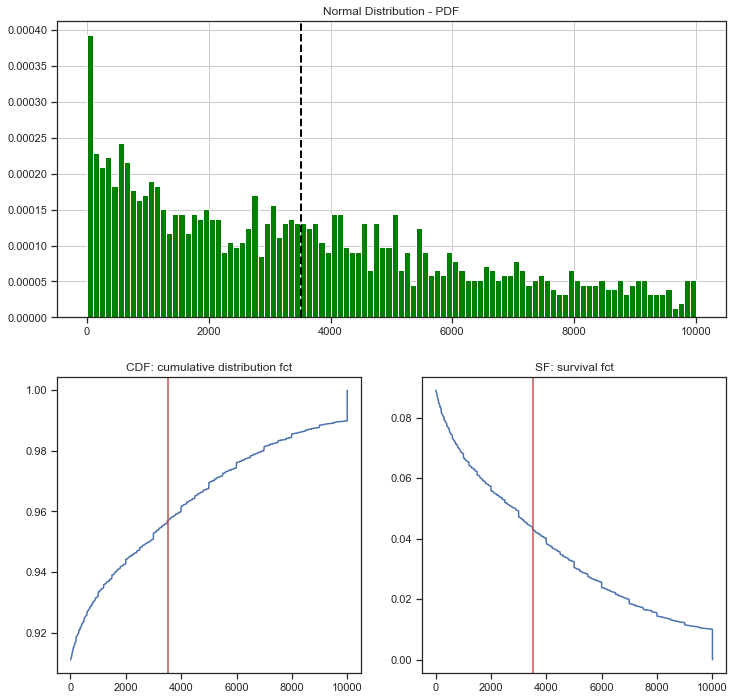

In [6]:
# stats_df.plot(x = 'ER30012', y = ['pdf', 'cdf'], grid = True)
plt.figure(figsize=(12,12))
ax = plt.subplot2grid((2,2),(0,0), colspan=2)
stats_df.ER30012.hist(density=5, bins=100, color='green')
plt.axvline(x=3520, color='black', ls='--', lw=2)
# plt.plot(stats_df.ER30012, stats_df.pdf,  'gs')
plt.title('Normal Distribution - PDF')

plt.subplot(223)
plt.plot(stats_df.ER30012, stats_df.cdf, 'b-')
plt.axvline(x=3520, color='r')
plt.title('CDF: cumulative distribution fct')

plt.subplot(224)
plt.plot(stats_df.ER30012, stats_df.sft, 'b-')
plt.axvline(x=3520, color='r')
plt.title('SF: survival fct')

plt.show()

((array([-3.31823895, -3.0619745 , -2.91952083, ...,  2.91952083,
          3.0619745 ,  3.31823895]),
  array([   3,    5,    7, ..., 9980, 9998, 9999], dtype=int64)),
 (2587.823856157615, 3518.3915032679743, 0.9676678528470618))

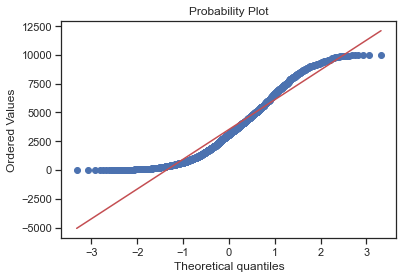

In [9]:
stats.probplot(x, plot=plt)

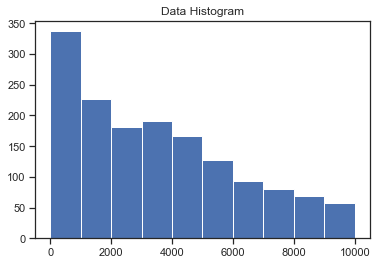

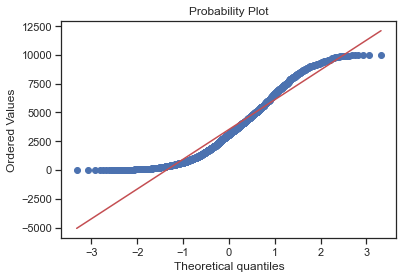

p-values for all 1530 data points: ----------------
Omnibus               2.271242e-30
Shapiro-Wilk          2.911678e-25
Lilliefors            1.000000e-03
Kolmogorov-Smirnov    3.260357e-12
dtype: float64
p-values for the first 10 percent data points: ----------------
Omnibus               4.088741e-17
Shapiro-Wilk          4.530538e-07
Lilliefors            1.000000e-03
Kolmogorov-Smirnov    2.192583e-02
dtype: float64
3.2603569143149913e-12


C:\Users\magda\AppData\Local\Temp/ipykernel_9172/3443304278.py:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()
C:\Users\magda\AppData\Local\Temp/ipykernel_9172/3443304278.py:30: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pFewVals = pd.Series()


In [19]:
# additional packages
from statsmodels.stats.diagnostic import lilliefors

def check_normality():
    '''Check if the distribution is normal.'''
    
    # # Set the parameters
    # numData = 1000
    # myMean = 0
    # mySD = 3
    
    # # To get reproducable values, I provide a seed value
    # np.random.seed(1234)   
    
    # Generate and show random data
    # data = stats.norm.rvs(myMean, mySD, size=numData)
    data = x
    fewData = data[:int(len(data)*.1)]
    plt.hist(data)
    plt.title("Data Histogram")
    plt.show()

    # --- >>> START stats <<< ---
    # Graphical test: if the data lie on a line, they are pretty much
    # normally distributed
    _ = stats.probplot(data, plot=plt)
    plt.show()

    pVals = pd.Series()
    pFewVals = pd.Series()
    # The scipy normaltest is based on D-Agostino and Pearsons test that
    # combines skew and kurtosis to produce an omnibus test of normality.
    _, pVals['Omnibus']    = stats.normaltest(data)
    _, pFewVals['Omnibus'] = stats.normaltest(fewData)

    # Shapiro-Wilk test
    _, pVals['Shapiro-Wilk']    = stats.shapiro(data)
    _, pFewVals['Shapiro-Wilk'] = stats.shapiro(fewData)
    
    # Or you can check for normality with Lilliefors-test
    _, pVals['Lilliefors']    = lilliefors(data)
    _, pFewVals['Lilliefors'] = lilliefors(fewData)
    
    # Alternatively with original Kolmogorov-Smirnov test
    _, pVals['Kolmogorov-Smirnov']    = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')
    _, pFewVals['Kolmogorov-Smirnov'] = stats.kstest((fewData-np.mean(fewData))/np.std(fewData,ddof=1), 'norm')
    
    print('p-values for all {0} data points: ----------------'.format(len(data)))
    print(pVals)
    print('p-values for the first 10 percent data points: ----------------')
    print(pFewVals)
    
    if pVals['Omnibus'] > 0.05:
        print('Data are normally distributed')
    # --- >>> STOP stats <<< ---
    
    return pVals['Kolmogorov-Smirnov']
    
if __name__ == '__main__':
    p = check_normality()    
    print(p)


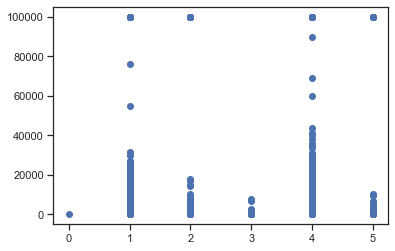

In [10]:
df.ER30080.replace(0, None, inplace=True)

plt.scatter(df.ER30080, df.ER30057)

In [9]:
stats.normaltest(df.ER30080)

NormaltestResult(statistic=63561.405532929246, pvalue=0.0)

In [5]:
stats.ttest_1samp(x, 35200)

Ttest_1sampResult(statistic=-6399.260173627391, pvalue=0.0)

In [8]:
stats.ttest_rel(x, df.ER30057)

Ttest_relResult(statistic=-15.791682592390458, pvalue=4.3492320667011575e-56)

In [21]:
def check_mean():
    '''Data from Altman, check for significance of mean value.
    Compare average daily energy intake (kJ) over 10 days of 11 healthy women, and compare it to the recommended level of 7725 kJ.
    '''
    # Get data from Altman
    # inFile = 'altman_91.txt'
    # data = np.genfromtxt(inFile, delimiter=',')

    # Watch out: by default the standard deviation in numpy is calculated with ddof=0, corresponding to 1/N!
    myMean = np.mean(x)
    mySD = np.std(x, ddof=1)     # sample standard deviation
    print(('Mean and SD: {0:4.2f} and {1:4.2f}'.format(myMean, mySD)))

    # Confidence intervals
    tf = stats.t(len(x)-1)
    # multiplication with np.array[-1,1] is a neat trick to implement "+/-"
    ci = np.mean(x) + stats.sem(x)*np.array([-1, 1])*tf.ppf(0.975)
    print(
        ('The confidence intervals are {0:4.2f} to {1:4.2f}.'.format(ci[0], ci[1])))

    # Check if there is a significant difference relative to "checkValue"
    checkValue = 325
    # --- >>> START stats <<< ---
    t, prob = stats.ttest_1samp(x, checkValue)
    if prob < 0.05:
        print(('{0:4.2f} is significantly different from the mean (p={1:5.3f}).'.format(
            checkValue, prob)))

    # For not normally distributed data, use the Wilcoxon signed rank sum test
    (rank, pVal) = stats.wilcoxon(x-checkValue)
    issignificant = 'unlikely' if pVal < 0.05 else 'likely'
    # --- >>> STOP stats <<< ---
    print(('It is ' + issignificant + ' that the value is {0:d}'.format(checkValue)))
    return prob  # should be 0.018137235176105802


def compareWithNormal():
    '''This function is supposed to give you an idea how big/small the difference between t- and normal
    distribution are for realistic calculations.
    '''
    # generate the data
    np.random.seed(12345)
    normDist = stats.norm(loc=320, scale=1520)
    data = normDist.rvs(100)
    checkVal = 6.5

    # T-test
    # --- >>> START stats <<< ---
    t, tProb = stats.ttest_1samp(data, checkVal)
    # --- >>> STOP stats <<< ---

    # Comparison with corresponding normal distribution
    mmean = np.mean(data)
    mstd = np.std(data, ddof=1)
    normProb = stats.norm.cdf(
        checkVal, loc=mmean, scale=mstd/np.sqrt(len(data)))*2
    # compare
    print(('The probability from the t-test is ' +
          '{0:5.4f}, and from the normal distribution {1:5.4f}'.format(tProb, normProb)))

    return normProb  # should be 0.054201154690070759


In [22]:
if __name__ == '__main__':
    check_mean()
    compareWithNormal()

Mean and SD: 360.18 and 1510.73
The confidence intervals are 349.51 to 370.85.
325.00 is significantly different from the mean (p=0.000).
It is unlikely that the value is 325
The probability from the t-test is 0.0232, and from the normal distribution 0.0211
